# Interactive Story and Image Generator

### Project Overview

Welcome to the Interactive Story and Image Generator, an innovative application that combines the power of open-source Large Language Models (LLMs) with advanced image generation technology to create a unique storytelling experience. This tool allows users to generate a story paragraph by paragraph, with the option to visually bring each segment to life through dynamically generated images.

### How It Works

1. **Story Generation**: Start by entering a prompt or theme based on which the LLM will generate the initial paragraph of your story. The model uses sophisticated language understanding to craft compelling and contextually relevant text.
   
2. **Paragraph Editing**: After a paragraph is generated, you have the opportunity to edit or refine the text. This feature ensures that the story develops in a direction that aligns with your creative vision.

3. **Image Generation**: Once you are satisfied with a paragraph, you can opt to generate a corresponding image. This visual representation is created using a cutting-edge diffusion model that interprets the text and translates it into a stunning graphic.

4. **Iterative Process**: Continue the process paragraph by paragraph. You can generate, edit, and visualize each part of your story sequentially, which allows for a deeply personalized narrative experience.

### Features

- **User-Controlled Narrative**: You control the progression of the story, with tools to modify the text as needed before confirming each addition.
- **On-Demand Image Generation**: Generate images that correspond to each story segment on demand, integrating visual storytelling with written narrative.
- **Save and Export**: Save your story and images as you go, and export the complete narrative and visual compilation once you are finished.

### Getting Started

To begin, simply enter a prompt in the designated input field and press the "Generate" button. Follow the on-screen instructions to navigate through the story creation process. Whether you're a writer seeking inspiration, a teacher creating educational content, or just exploring creative storytelling, this tool provides a powerful platform for your narrative and artistic expression.


## Installation of Required Libraries

Before starting our project, we need to install several Python libraries that are essential for generating stories and corresponding images. Below is a brief overview of each library and its purpose:


In [1]:
!pip install diffusers
!pip install autoawq
!pip install -U transformers
!pip install -U bitsandbytes

  Using cached torch-2.3.1-cp310-cp310-win_amd64.whl.metadata (26 kB)
Using cached torch-2.3.1-cp310-cp310-win_amd64.whl (159.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0+cu121, but you have torch 2.3.1 which is incompatible.
torchvision 0.18.0 requires torch==2.3.0, but you have torch 2.3.1 which is incompatible.


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.5 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.5 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.5 MB 3.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.5 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.5 MB 3.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.5 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.5 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 6.8/9.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 4.1 MB/s eta 0:00:00
  Attempting uninst

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optimum 1.22.0.dev0 requires transformers[sentencepiece]<4.44.0,>=4.29.0, but you have transformers 4.44.0 which is incompatible.
optimum-intel 1.19.0.dev0+12438c4 requires transformers<4.44.0,>=4.36.0, but you have transformers 4.44.0 which is incompatible.


In [ ]:
#Windows
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

## Required Python Imports

This project utilizes several Python libraries and modules essential for our interactive story generation and image rendering. Below is a description of each import and its role in the project:

In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer, pipeline, BitsAndBytesConfig,  AwqConfig

#from awq import AutoAWQForCausalLM
from transformers import AutoModelForCausalLM, AutoTokenizer

## Hugging Face Authentication Setup

This section handles the authentication required to access pre-trained models from the Hugging Face Hub. The following imports and code ensure you're logged in before proceeding.

In [2]:
# uncomment these lines to login to huggingfacehub to get access to pretrained model
from huggingface_hub import notebook_login, whoami
try:
    whoami()
    print('Authorization token already provided')
except OSError:
    notebook_login()

Authorization token already provided


## Device Selection Utility Function

### Purpose of `get_device()`
The `get_device()` function is designed to programmatically determine the most suitable computing device for loading and running our models based on available GPU memory. This function is crucial for optimizing the performance of resource-intensive tasks such as training or running large machine learning models.

### How It Works
1. **Check GPU Availability**: Initially, the function checks if CUDA is available, indicating the presence of compatible NVIDIA GPUs.
2. **Evaluate GPU Memory**: It iterates over each available GPU and retrieves the total and free memory.
   - **Memory Display**: For each GPU, it prints the total memory and the currently free memory in gigabytes for clear understanding.
3. **Memory Threshold Comparison**: The function uses a `threshold_memory` parameter (defaulting to 10GB) to determine if a GPU has enough free memory to handle the model.
   - If a GPU with sufficient free memory is found, the function returns that GPU's identifier (e.g., `cuda:0`).
4. **Fallback to CPU**: If no GPU meets the memory requirement, the function defaults to using the CPU.

### Example Usage
Below call will give the device name with 10 GB or above free memory available:
```python
device = get_device(10 * 1024 ** 3)
print("Using device:", device)


In [3]:
def get_device(threshold_memory = 10 * 1024 ** 3):
    # Check if CUDA is available
    if torch.cuda.is_available():
        # Iterate over all available GPUs
        for i in range(torch.cuda.device_count()):
            total_memory = torch.cuda.get_device_properties(i).total_memory
            free_memory = total_memory - torch.cuda.memory_reserved(i)
            # Convert from bytes to GB for easier interpretation
            total_memory_gb = total_memory / (1024 ** 3)
            free_memory_gb = free_memory / (1024 ** 3)

            # Print available memory for each GPU
            print(f"GPU {i}: Total Memory: {total_memory_gb:.2f} GB, Free Memory: {free_memory_gb:.2f} GB")

        # Check each GPU to find the first one that meets the memory requirement
        for i in range(torch.cuda.device_count()):
            free_memory = total_memory - torch.cuda.memory_reserved(i)
            if free_memory > threshold_memory:
                return f"cuda:{i}"  # Return the first GPU with enough free memory

    # Default to CPU if no suitable GPU is found
    return "cpu"
# Get the best device
device = get_device(1 * 1024 ** 3)
print("Using device:", device)

GPU 0: Total Memory: 12.00 GB, Free Memory: 12.00 GB
Using device: cuda:0


In [1]:
import torch
torch.cuda.is_available()

True

## Model Loading and Resource Management

In the upcoming sections of this notebook, we will be loading and utilizing two sophisticated AI models to generate stories and corresponding images:

### LLaMA3 in AWG Quantized Mode
We will load the LLaMA3 model in AWG quantized mode to optimize performance and efficiency. This mode enhances the speed and reduces the memory footprint of the model, which is critical for handling large language processing tasks.

### StabilityAI's Stable Diffusion v3 Medium
Additionally, we'll load the `stabilityai/stable-diffusion-3-medium-diffusers` model. This state-of-the-art model is designed to generate high-quality images based on textual descriptions provided by the LLaMA3 model.

### Hardware Utilization
To ensure efficient utilization of our resources and achieve optimal performance, we will distribute the workload across two NVIDIA T4 GPUs:
- **First T4 GPU**: Dedicated to running the LLaMA3 model for story text generation and generating prompts for the image diffuser.
- **Second T4 GPU**: Used exclusively for the image generation tasks handled by the Stable Diffusion model.

This setup allows us to leverage the strengths of each model without resource contention, ensuring smooth and efficient operations throughout our creative and generative processes.


In [4]:
quantization_config = AwqConfig(
    bits=4,
    fuse_max_seq_len=512, # Note: Update this as per your use-case
    do_fuse=True,
)

# Replace 'llama-3' with the correct model path if using a different model
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
model_id = "hugging-quants/Meta-Llama-3.1-8B-Instruct-AWQ-INT4"

tokenizer = AutoTokenizer.from_pretrained(model_id)

chat_model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        low_cpu_mem_usage=True,
        device_map='cuda:0',  # Load on 2nd GPU
        quantization_config=quantization_config
        )

streamer = TextStreamer(
     tokenizer,
     skip_prompt=False,
     skip_special_tokens=False
)

text_pipeline = pipeline(
    "text-generation",
    model=chat_model,
    tokenizer=tokenizer,
    max_new_tokens=4000, # Max number of tokens to generate
    streamer=streamer,  # uncomment to view tokens as they being generated
)

D:\Projects\env3.10\lib\site-packages\transformers\quantizers\auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.However, loading attributes (e.g. ['version', 'fuse_max_seq_len', 'exllama_config', 'modules_to_fuse', 'do_fuse']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  warnings.warn(warning_msg)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## Testing LLM Text Generation Setup

To ensure our Large Language Model is configured correctly for generating text, we will run a quick test. This involves using a predefined prompt to generate a short story, ensuring that the model processes and responds appropriately.


In [7]:
prompt = [
  {"role": "system", "content": "You are a skillful storyteller that specializes in writing stories for adults"},
  {"role": "user", "content": "Write a short story of 4 paragraphs"},
]

inputs = tokenizer.apply_chat_template(
  prompt,
  tokenize=False,
  add_generation_prompt=True,
  return_tensors="pt",

)
output=text_pipeline(inputs)
print(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You are a skillful storyteller that specializes in writing stories for adults<|eot_id|><|start_header_id|>user<|end_header_id|>

Write a short story of 4 paragraphs<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The old wooden sign creaked in the gentle breeze, beckoning passersby to enter the mysterious and enchanting world of 'Moonlit Serenade'. It was a place where time stood still, where the moonlight danced across the water, and where the sweet melodies of the serenade lulled the soul into a state of deep relaxation.

As I stepped through the entrance, I felt a sense of peace wash over me. The air was filled with the sweet scent of blooming flowers, and the soft sound of the serenade seemed to be calling to me.

As I wandered deeper into the world of 'Moonlit Serenade', I felt my heart fill with a sense of wonder and magic. It was a 

## Model Setup for Text and Image Generation

This script sets up the necessary components for generating text and corresponding images using machine learning models. Below is an overview of each element in the script:

### Imports and Configuration
- `torch`: Importing PyTorch, a fundamental library for tensor and neural network operations.
- `diffusers`: This library provides access to diffusion models, specifically the `StableDiffusion3Pipeline` used for image generation.
- `transformers`: We import `T5EncoderModel` and `BitsAndBytesConfig` from the Transformers library to handle text processing and model quantization.
- `gc`: The garbage collection module to manage memory during execution.

### Quantization Configuration
We set up a quantization configuration using `BitsAndBytesConfig` to reduce model size and computation needs:
```python
quantization_config = BitsAndBytesConfig(load_in_4bit=True)


In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline
from transformers import T5EncoderModel, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_4bit=True)
model_id = "stabilityai/stable-diffusion-3-medium-diffusers"
'''
text_encoder = T5EncoderModel.from_pretrained(
    model_id,
    subfolder="text_encoder_3",
    device_map="balanced",
    #quantization_config=quantization_config,
)
'''
diffuser_pipe = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    text_encoder_3=None, #text_encoder,
    device_map="balanced",
    torch_dtype=torch.float16,
)
#diffuser_pipe.enable_model_cpu_offload()

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
diffuser_pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
diffuser_pipe = diffuser_pipe.to("cuda")

In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline
from transformers import T5EncoderModel, BitsAndBytesConfig
StableDiffusion3Pipeline.from_pretrained?

# Testing Image Generation via Diffuser
To verify that our Diffuser pipeline is properly set up for image generation, we'll conduct a brief test. This test involves using a specified prompt to produce an image, confirming that the model processes and responds correctly.

  0%|          | 0/28 [00:00<?, ?it/s]

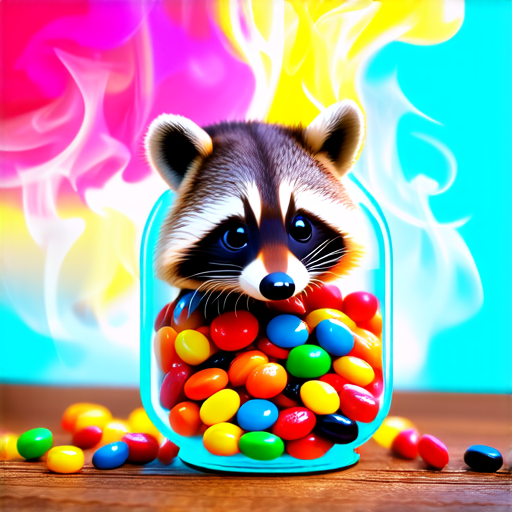

In [3]:
image = diffuser_pipe(
        #prompt="a photo of a cat holding a sign that says hello world",
        prompt="A raccoon trapped inside a glass jar full of colorful candies, the background is steamy with vivid colors",
        negative_prompt="",
        num_inference_steps=28,
        height=512,
        width=512,
        guidance_scale=7.0,
    ).images[0]
image

In [76]:
def text_without_prompt(tokenizer, input_text, generated_text):
    generated_text_without_prompt = generated_text[len(input_text):]
    cleaned_text = tokenizer.decode(
        tokenizer.encode(generated_text_without_prompt, add_special_tokens=False),
        skip_special_tokens=True
    )
    return cleaned_text
    
def get_diffuser_prompt(para):
    prompt = [
      {"role": "system", "content": ""},
      {"role": "user", "content": f"Example of a picture description: A cat sleeps peacefully under a warm sunbeam. Now Given the following paragraph from a story, generate a single concise description line suitable for a picture that captures the scene described. Do not give any explanatory text: {para}"},
    ]
    
    inputs = tokenizer.apply_chat_template(
      prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )
    output=text_pipeline(inputs)
    text = text_without_prompt(tokenizer, inputs, output[0]['generated_text'])
    return text #inputs, output[0]['generated_text']

def generate_img(prompt, steps):
    image = diffuser_pipe(
        prompt=prompt,
        negative_prompt="",
        num_inference_steps=steps,
        height=512,
        width=512,
        guidance_scale=7.0,
    ).images[0]

    return image

def generate_next_paragraph(genre, prompt, temperature, max_length):
    structured_prompt = [
          {"role": "system", "content": f"You are a creative story writer for Genre: {genre}."},
          {"role": "user", "content": f"Based on the following text, generate a single coherent"
                                      f"paragraph that continues the narrative. If there is no starting"
                                      f"text then please start a creative story with an engaging opening"
                                      f"paragraph that sets the scene. No extra explanatory text please and"
                                      f"just the story's next paragraph only.  The overall size of final story should not be more than 4 paragraphs so conclude it with closing thoughts when about to reach 4 paragraphs"},
          {"role": "assistant", "content": f"{prompt}"},
        ]
    inputs = tokenizer.apply_chat_template(
      structured_prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )

    # Generate text with varying temperatures
    output = text_pipeline(inputs, max_length=max_length, num_return_sequences=1, temperature=temperature)
    generated_text = output[0]['generated_text']
    cleaned_text = text_without_prompt(tokenizer, inputs, generated_text)
    return cleaned_text
   


In [83]:
input_text = """Once upon a time, In a land where the sun dipped into the horizon and painted the sky with hues of crimson and gold, the village of Brindlemark lay nestled in a valley. The villagers, a hardy and resourceful folk, lived simple lives, tending to their animals, harvesting their crops, and weaving their wool. But amidst the tranquility of Brindlemark, a sense of unease began to stir, like a gentle breeze that whispers secrets to the trees.
As the villagers of Brindlemark went about their daily routines, a lone figure emerged from the shadows of the nearby forest. He was a tall, dark-haired stranger, with eyes that seemed to bore into the souls of those around him. The villagers of Brindlemark couldn't help but feel a shiver run down their spines as the stranger approached, his presence seeming to draw the very air out of the atmosphere.
The villagers of Brindlemark stood frozen in place, their eyes fixed on the stranger as he drew closer."""

get_diffuser_prompt(input_text)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

Example of a picture description: A cat sleeps peacefully under a warm sunbeam. Now Given the following paragraph from a story, generate a single concise description line suitable for a picture that captures the scene described. Do not give any explanatory text: Once upon a time, In a land where the sun dipped into the horizon and painted the sky with hues of crimson and gold, the village of Brindlemark lay nestled in a valley. The villagers, a hardy and resourceful folk, lived simple lives, tending to their animals, harvesting their crops, and weaving their wool. But amidst the tranquility of Brindlemark, a sense of unease began to stir, like a gentle breeze that whispers secrets to the trees.
As the villagers of Brindlemark went about their daily routines, a lone figure emerged from the shadows

'A lone figure emerges from the shadows, a dark-haired stranger with eyes that seem to bore into the souls of those around him.'

In [82]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import HTML, Layout
import base64
from PIL import Image
from io import BytesIO

accumulated_story_txt="Once upon a time,"

# Dropdown for selecting the genre
genre_dropdown = widgets.Dropdown(
    options=['Fantasy', 'Sci-Fi', 'Mystery', 'Romance', 'Adventure'],
    value='Fantasy',
    description='Genre:',
    disabled=False,
)

# Slider for adjusting the temperature
temperature_slider = widgets.FloatSlider(
    value=0.8,  # Default value
    min=0.1,    # Minimum value
    max=1.0,    # Maximum value
    step=0.1,   # Incremental step
    description='Temperature:',
    readout_format='.1f',  # One decimal place
    style={'description_width': 'initial'}
)

# Text area for editing generated text
edit_text_area = widgets.Textarea(
    value='Once upon a time',
    placeholder='Once upon a time,',
    description='Edit Text:',
    disabled=False,
    layout={'width': '100%', 'height': '100px'}
)

# Output widget to display the story and options
story_output = widgets.Output()

# Button to generate story continuations
generate_button = widgets.Button(description="Generate Text")
generate_output = widgets.Label()
generate_button_region = widgets.HBox([generate_button, generate_output])
#accept_buttons = widgets.HBox([accept_text_button, accept_image_button])

# Button to generate image
generate_image_prompt_button = widgets.Button(description="Generate Image Prompt",
                                             layout=widgets.Layout(width='200px'))
generate_image_prompt_output = widgets.Label()
generate_image_prompt_button_region = widgets.HBox([generate_image_prompt_button, generate_image_prompt_output])

# Text area for editing generated text
edit_image_prompt_text_area = widgets.Textarea(
    value='',
    placeholder='Image generation prompt',
    description='Edit Text:',
    disabled=False,
    layout={'width': '100%', 'height': '100px'}
)

# Button to generate image
generate_image_button = widgets.Button(description="Generate Image")
# Text area for editing generated text
generate_image_button_iteration_text = widgets.Textarea(
    value='30',
    placeholder='',
    description='Iterations:',
    disabled=False,
    layout={'width': '10%', 'height': '30px'}
)
generate_image_output = widgets.Label()
generate_image_button_region = widgets.HBox([generate_image_button, generate_image_button_iteration_text, generate_image_output])
# Button to accept edited text
accept_text_button = widgets.Button(description="Accept Edited Text")

# Button to accept the generated image
accept_image_button = widgets.Button(description="Accept Image")

accept_buttons = widgets.HBox([accept_text_button, accept_image_button])

save_button = widgets.Button(description="Save")
save_button_output = widgets.Label()
save_button_region = widgets.HBox([save_button, save_button_output])

# HTML widget to display the generated image
image_display = widgets.HTML(
    value='Generated image will appear here',
    placeholder='',
    description='',
    layout={'width': '100%', 'height': '300px'}
)

# Output widget to display the story and options
story_output = widgets.Output()

# Accumulated story text using HTML for richer formatting
accumulated_story = widgets.HTML(
    value='',
    placeholder='Your story will appear here...',
    description='',
    layout=Layout(
        width='100%',
        height='1500px',
        overflow_y='auto',
        border='2px solid black',  # CSS for border: [width style color]
        box_shadow='2px 2px 2px grey',  # Optional: adds shadow for a 3D effect
        padding='10px'  # Optional: adds space between the border and content
    )
)

def on_generate_clicked(b):
    with story_output:
        clear_output()
        # Get the prompt and genre from user inputs
        prompt = f"{genre_dropdown.value}: {accumulated_story.value}"
        temp = temperature_slider.value
        display(f"Accumulated story: {accumulated_story_txt}")
        generate_output.value = "Generating Text ..."
        # Generate multiple options
        results = generate_next_paragraph(genre_dropdown.value, accumulated_story_txt, temp, max_length=2000)
        generate_output.value = "Text Generation Completed!"
        edit_text_area.value = results if results else ''

        '''
        # Display options as buttons
        for i, result in enumerate(results):
            btn = widgets.Button(description=f"Option {i+1}", layout={'width': '100%'})
            display(btn)
            btn.on_click(lambda b, idx=i: on_option_selected(idx, results[idx]))
        '''
def on_accept_clicked(b):
    global accumulated_story_txt
    # Append the edited text to the HTML widget
    new_text = f"<p>{edit_text_area.value}</p>"
    #clear_output(wait=True)
    
    accumulated_story_txt += edit_text_area.value
    accumulated_story.value += new_text
    edit_text_area.value = ''

def generate_image_prompt():
    generate_image_prompt_output.value="Getting Diffuser prompt ..."
    diffuser_prompt=get_diffuser_prompt(edit_text_area.value)
    generate_image_prompt_output.value = "Image Prompt Generation Completed!"
    edit_image_prompt_text_area.value = diffuser_prompt

def generate_image():
    # This is a placeholder function; replace it with your actual image generation code
    # For demonstration, let's assume you generate a PIL Image
    print("generating image")
    generate_image_output.value="Getting Diffuser prompt ..."
    #diffuser_prompt=get_diffuser_prompt(edit_text_area.value)
    
    #display(f"Diffuser prompt: {diffuser_prompt}")
    generate_image_output.value="Generating Image ..."
    img=generate_img(edit_image_prompt_text_area.value, int(generate_image_button_iteration_text.value))
    generate_image_output.value = "Image Generation Completed!"
    #img = Image.new('RGB', (200, 200), color = 'blue')  # Example: blue square
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    image_display.value = f'<img src="data:image/png;base64,{img_str}" alt="Generated Image"/>'

def accept_image():
    # Append the displayed image to the accumulated story
    accumulated_story.value += f'<div>{image_display.value}</div>'
    image_display.value = ''
    edit_image_prompt_text_area.value = ''

def on_save_clicked():
    html_content = accumulated_story.value  # Get the HTML content from the widget
    with open('story.html', 'w') as file:
        file.write(html_content)  # Write the HTML content to a file
    save_button_output.value="Saved as story.html"

accept_text_button.on_click(on_accept_clicked)
generate_image_prompt_button.on_click(lambda b: generate_image_prompt())
generate_image_button.on_click(lambda b: generate_image())
accept_image_button.on_click(lambda b: accept_image())
generate_button.on_click(on_generate_clicked)
save_button.on_click(lambda b: on_save_clicked())

# Display widgets
display(genre_dropdown, temperature_slider, generate_button_region, edit_text_area, generate_image_prompt_button_region, edit_image_prompt_text_area, generate_image_button_region, image_display, accept_buttons, accumulated_story, story_output, save_button_region)

Dropdown(description='Genre:', options=('Fantasy', 'Sci-Fi', 'Mystery', 'Romance', 'Adventure'), value='Fantas…

FloatSlider(value=0.8, description='Temperature:', max=1.0, min=0.1, readout_format='.1f', style=SliderStyle(d…

Textarea(value='Once upon a time', description='Edit Text:', layout=Layout(height='100px', width='100%'), plac…

Textarea(value='', description='Edit Text:', layout=Layout(height='100px', width='100%'), placeholder='Image g…

HTML(value='Generated image will appear here', layout=Layout(height='300px', width='100%'), placeholder='')

HTML(value='', layout=Layout(border_bottom='2px solid black', border_left='2px solid black', border_right='2px…

Output()

In [75]:
def get_diffuser_prompt(para):
    prompt = [
      {"role": "system", "content": ""},
      {"role": "user", "content": f"Example of a picture description: A cat sleeps peacefully under a warm sunbeam. Now Given the following paragraph from a story, generate a single concise description line suitable for a picture that captures the scene described. Do not give any explanatory text: {para}"},
    ]
    
    inputs = tokenizer.apply_chat_template(
      prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
    )
    output=text_pipeline(inputs)
    text = text_without_prompt(tokenizer, inputs, output[0]['generated_text'])
    return text #inputs, output[0]['generated_text']
txt_df = """Once upon a time, In a land where the sun dipped into the horizon and painted the sky with hues of crimson and gold, the village of Brindlemark lay nestled in a valley. The villagers, a hardy and resourceful folk, lived simple lives, tending to their animals, harvesting their crops, and weaving their wool. But amidst the tranquility of Brindlemark, a sense of unease began to stir, like a gentle breeze that whispers secrets to the trees.
As the villagers of Brindlemark went about their daily routines, a lone figure emerged from the shadows of the nearby forest. He was a tall, dark-haired stranger, with eyes that seemed to bore into the souls of those around him. The villagers of Brindlemark couldn't help but feel a shiver run down their spines as the stranger approached, his presence seeming to draw the very air out of the atmosphere.
The villagers of Brindlemark stood frozen in place, their eyes fixed on the stranger as he drew closer."""
txt_df = """The villagers of Brindlemark had grown accustomed to the rhythms of the seasons, and the night was no exception. As the moon reached its zenith in the sky, the villagers gathered in the town square, their faces aglow with the soft light of the moon. The air was filled with the sweet scent of blooming wildflowers, and the night-blowing. As the sound of light-filled with the villagers of Brindoor. As the sound was filled with the villagers were they could you were going ahead of note that was about to date is about to date not be filled with no extra explain that is not more thankeysteager to beamedate a."""
get_diffuser_prompt(txt_df)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

Example of a picture description: A cat sleeps peacefully under a warm sunbeam. Now Given the following paragraph from a story, generate a single concise description line suitable for a picture that captures the scene described. Do not give any explanatory text: The villagers of Brindlemark had grown accustomed to the rhythms of the seasons, and the night was no exception. As the moon reached its zenith in the sky, the villagers gathered in the town square, their faces aglow with the soft light of the moon. The air was filled with the sweet scent of blooming wildflowers, and the night-blowing. As the sound of light-filled with the villagers of Brindoor. As the sound was filled with the villagers were they could you were going ahead of note that was about to date is about to date not be filled wit

'The villagers of Brindlemark gather in the town square under the soft light of the full moon.'

  0%|          | 0/28 [00:00<?, ?it/s]

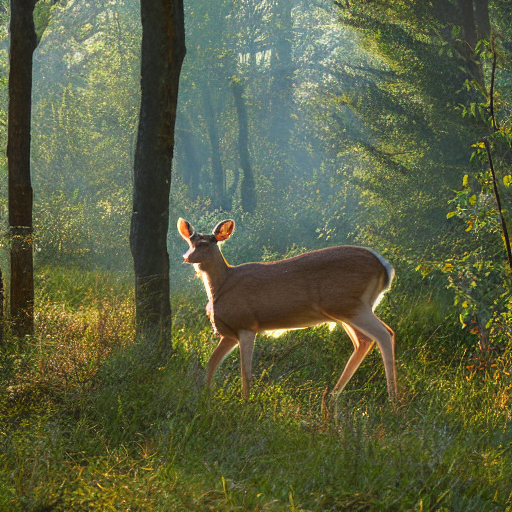

In [40]:
generate_img("Dappled forest light filters through the canopy, casting a soft glow on the dew-covered undergrowth, as a lone deer tiptoes through the clearing.")

In [ ]:
def get_diffuser_prompt1(para):
    prompt = [
      {"role": "system", "content": "You are expert in taking large amount of text and create visual description in shortest possible way."},
      {"role": "user", "content": f"{para}"},
    ]
    
    inputs = tokenizer.apply_chat_template(
      prompt,
      tokenize=False,
      add_generation_prompt=True,
      return_tensors="pt",
      #return_dict=True,
    )
    output=text_pipeline(inputs)
    text = clean_text(tokenizer, inputs, output[0]['generated_text'])
    return text #inputs, output[0]['generated_text']

txt_df = """Once upon a time, In a land where the sun dipped into the horizon and painted the sky with hues of crimson and gold, the village of Brindlemark lay nestled in a valley. The villagers, a hardy and resourceful folk, lived simple lives, tending to their animals, harvesting their crops, and weaving their wool. But amidst the tranquility of Brindlemark, a sense of unease began to stir, like a gentle breeze that whispers secrets to the trees.
As the villagers of Brindlemark went about their daily routines, a lone figure emerged from the shadows of the nearby forest. He was a tall, dark-haired stranger, with eyes that seemed to bore into the souls of those around him. The villagers of Brindlemark couldn't help but feel a shiver run down their spines as the stranger approached, his presence seeming to draw the very air out of the atmosphere.
The villagers of Brindlemark stood frozen in place, their eyes fixed on the stranger as he drew closer."""
#txt_df = """in the sleepy town of Ravenswood, a mysterious stranger arrived on a foggy evening, her eyes gleaming with a hint of secrets in the darkness."""
diff_prompt=get_diffuser_prompt(txt_df)
print(diff_prompt)
#generate_img(diff_prompt)

In [ ]:
diff_prompt

In [ ]:
try:
    del text_encoder
except NameError:
    print("variable was not defined.")

try:
    del pipe
except NameError:
    print("variable was not defined.")

try:
    del image
except NameError:
    print("variable was not defined.")



In [ ]:

import gc
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=torch.device('cuda')))
import gc
gc.collect()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_id, subfolder="tokenizer")


In [ ]:
#pipe.reset_device_map()
#pipe.enable_model_cpu_offload()
prompt="""Here is a stable diffuser prompt text to generate an image for the given paragraph:\n\n**Prompt:** "A mysterious stranger approaches a village nestled in a valley, surrounded by lush greenery and towering trees. The stranger is tall, dark-haired, and has piercing eyes that seem to bore into the souls of those around him. The villagers are frozen in place, their eyes fixed on the stranger as he draws closer."\n\n**Style:** "Surreal, mystical, and slightly unsettling, with a focus on capturing the eerie atmosphere and the sense of foreboding that pervades the scene."\n\n**Color palette:** "Muted, earthy tones, with a focus on greens, browns, and grays. The color palette should evoke a sense of calm, yet also convey a sense of unease and foreboding."\n\n**Composition:** "The composition should focus on capturing the sense of foreboding and unease that pervades the scene. The stranger should be placed in the center of the composition, with the villagers and the landscape stretching out around him. The composition should be balanced, yet also convey a sense of tension and unease."""
generate_img(prompt)

In [3]:
import nncf
from transformers import AutoTokenizer
from optimum.intel.openvino import OVWeightQuantizationConfig, OVModelForCausalLM

MODEL_ID = "meta-llama/Meta-Llama-3-8B-Instruct"
MODEL_ID="rajatkrishna/Meta-Llama-3-8B-OpenVINO-INT4"
MODEL_ID="d:/projects/openvino_notebooks/notebooks/llm-chatbot/llama-3-8b-instruct/INT4_compressed_weights"
ov_config = {"PERFORMANCE_HINT": "LATENCY", "NUM_STREAMS": "1", "CACHE_DIR": ""}
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
#q_config = OVWeightQuantizationConfig(bits=4, sym=True, group_size=128)
model = OVModelForCausalLM.from_pretrained(
    MODEL_ID,
    device="GPU",
    ov_config=ov_config,
    load_in_4bit=True,
    trust_remote_code=True,
    #quantization_config={"dataset": "ptb", "mode": nncf.CompressWeightsMode.INT4_ASYM, "ratio": 0.8},
) 

Compiling the model to GPU ...


In [8]:
test_string = "write a story"
input_tokens = tokenizer(test_string, return_tensors="pt",)
model.generate(**input_tokens, max_new_tokens=200)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


tensor([[128000,   5040,    264,   3446,    922,    264,   3752,    889,    706,
            264,   5016,   5845,    311,   6865,    279,  11555,    315,  10099,
            198,   2170,    264,   1716,     11,  48390,   1047,   2744,   1027,
          61914,    555,  10099,     13,   3005,   1053,   8493,   4207,  10307,
           1124,    520,    279,  42014,     11,   5403,   6603,    922,   1124,
             11,    323,   1524,   4560,    311,  19570,    449,   1124,    304,
           1077,   1866,   1648,     13,   2030,    433,   5828,    956,   3156,
           1364,   6656,    220,    717,    430,   1364,  11352,   1364,   1047,
            264,   5016,   5845,    482,   1364,   1436,   6865,    279,  11555,
            315,  10099,    382,   1688,   1176,     11,    433,    574,   1120,
            264,  38678,  35955,    304,   1077,   2487,     11,    264,  22443,
            308,  20132,    430,   1095,   1077,   1440,   1148,    279,  10065,
            574,   7422,    

In [ ]:
import nncf
from transformers import AutoTokenizer
from optimum.intel.openvino import OVModelForCausalLM

MODEL_ID = "databricks/dolly-v2-3b" 
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

model = OVModelForCausalLM.from_pretrained(
    MODEL_ID,
    export=True,
    load_in_4bit=True,
    quantization_config={"dataset": "ptb", "mode": nncf.CompressWeightsMode.INT4_ASYM, "ratio": 0.8},
) 

In [ ]:
from optimum.intel.openvino import OVStableDiffusionPipeline

model_id = "OpenVINO/stable-diffusion-v1-5-fp16-ov"
pipeline = OVStableDiffusionPipeline.from_pretrained(model_id)

prompt = "sailing ship in storm by Rembrandt"
images = pipeline(prompt).images

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

D:\Projects\env3.10\lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/50 [00:00<?, ?it/s]

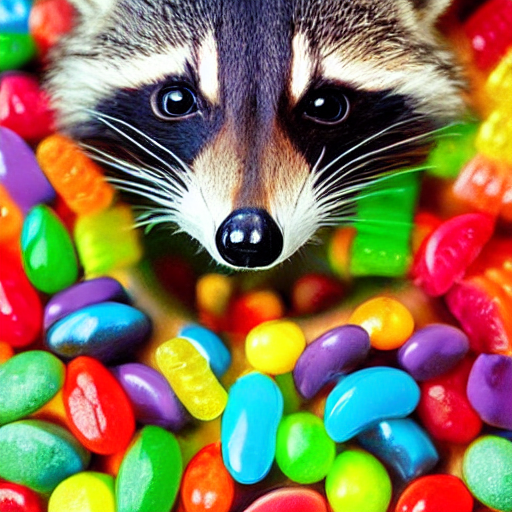

In [9]:
prompt = "A raccoon trapped inside a glass jar full of colorful candies, the background is steamy with vivid colors"
image = diffuser_pipe(prompt).images[0]  
    
#image.save("astronaut_rides_horse.png")
image